<a href="https://colab.research.google.com/github/victor-wildlife/wild_about_ai_classifications/blob/main/wild_about_ai_average_count_final_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title <font size="5">↓ ឵឵<i>Load libraries</font> { vertical-output: true }

import base64, io
import os
import gdown
import json
import ipywidgets as widgets
import pandas as pd
import matplotlib.pyplot as plt


from IPython.display import HTML
from IPython.display import HTML, display, clear_output


In [15]:
# @title <font size="5">↓ ឵឵<i>Load processed classifications (tut#8) and site information</font> { vertical-output: true }
classifications_df = pd.read_csv("/content/db_spyfish_csvSpyfish_Aotearoa2023-11-10classifications.csv")
sites_df = pd.read_csv("/content/sites_buv_doc.csv")

In [22]:
# @title <font size="5">↓ ឵឵<i>Combine and process classifications and site information</font> { vertical-output: true }

# Add site information based on site_ids
classifications_df1 = pd.merge(
    classifications_df,
    sites_df,
    how="left",
    left_on="siteName",
    right_on="SiteID",
)

# Recode values that contain the string "Type I MPA (Marine Reserve)" to "Protected"
classifications_df1['ProtectionStatus'] = classifications_df1['ProtectionStatus'].replace('Type I MPA (Marine Reserve)', 'Protected')
classifications_df1['ProtectionStatus'] = classifications_df1['ProtectionStatus'].replace('Type II MPA', 'Protected')
classifications_df1['ProtectionStatus'] = classifications_df1['ProtectionStatus'].replace('No Protection', 'No Protected')
classifications_df1['ProtectionStatus'] = classifications_df1['ProtectionStatus'].replace('No protection', 'No Protected')

# Get rid of nothinghere annotations
classifications_df1 = classifications_df1[classifications_df1['label'] != "NOTHINGHERE"]

# Select classifications from the MR of interest
reserves_of_interest = ['Kapiti Marine Reserve', 'Tapuae Marine Reserve', 'Tonga Island Marine Reserve']
classifications_df1 = classifications_df1[classifications_df1['LinkToMarineReserve_y'].isin(reserves_of_interest)]

# Replace "Marine reserve" with "MR" in the 'LinkToMarineReserve_y' column
classifications_df1['LinkToMarineReserve_y'] = classifications_df1['LinkToMarineReserve_y'].str.replace('Marine Reserve', 'MR')

# Sample an equal number of classifications inside and outside the reserves
groups = classifications_df1.groupby(['ProtectionStatus','LinkToMarineReserve_y'])
classifications_df1 = groups.apply(lambda x: x.sample(groups.size().min())).reset_index(drop=True)

In [23]:
# @title <font size="5">↓ ឵឵<i>Display the average counts in a table</font> { vertical-output: true }

classifications_df1.groupby(['LinkToMarineReserve_y','label', 'ProtectionStatus'])['how_many'].mean().unstack()

ProtectionStatus                     No Protected  Protected
LinkToMarineReserve_y label                                 
Kapiti MR             BLUECOD                 NaN  27.266667
Tapuae MR             BLUECOD                 NaN   1.000000
                      OTHER                   NaN   1.600000
                      SCARLETWRASSE      5.066667   3.333333
                      SNAPPER                 NaN   1.666667
Tonga Island MR       BLUECOD            4.000000   9.923077
                      OTHER              1.000000   1.000000
                      SNAPPER                 NaN   1.666667

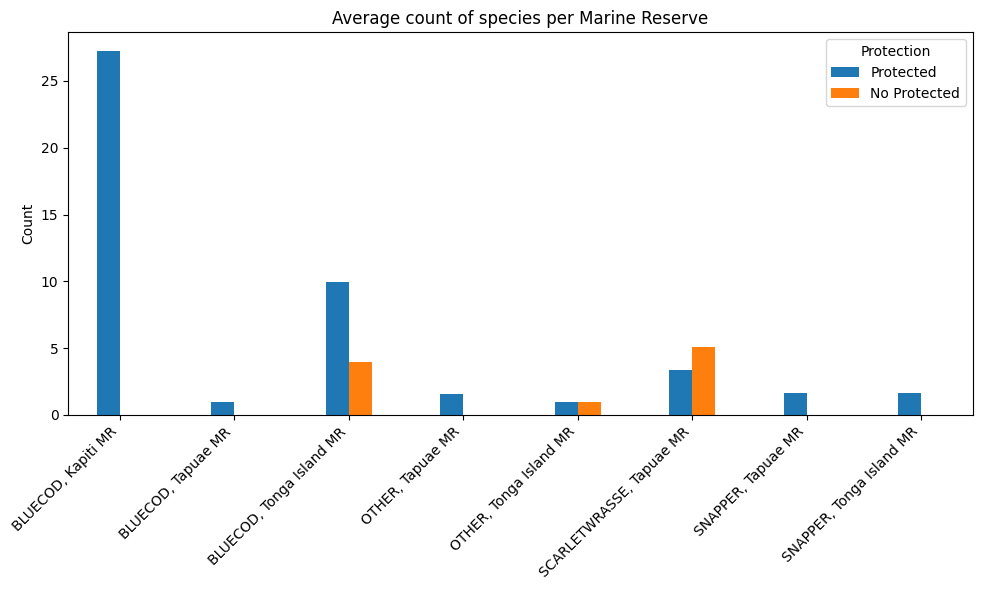

In [24]:
# @title <font size="5">↓ ឵឵<i>Display the average counts in a graph</font> { vertical-output: true }

# Group data by species and protection status and sum counts
species_counts = classifications_df1.groupby(['label','LinkToMarineReserve_y', 'ProtectionStatus'])['how_many'].mean().unstack()

# Arrange df to have protected vs no protected and from higest to lowest number of count
species_counts = species_counts.sort_values("Protected", ascending=False)[['Protected', 'No Protected']]
species_counts = species_counts.sort_values(["label", "LinkToMarineReserve_y"], ascending=True)


# Set the figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Plot side-by-side bar chart
species_counts.plot(kind='bar', width=0.4, ax=ax)

# Get x-axis labels
x_labels = ax.get_xticklabels()

# Remove parentheses from x-labels
new_labels = []
for label in x_labels:
    if '(' in label.get_text():
        new_labels.append(label.get_text().replace('(', '').replace(')', ''))
    else:
        new_labels.append(label.get_text())

# Set new x-axis labels
ax.set_xticklabels(new_labels, rotation=45, ha='right')

plt.xlabel('')
plt.ylabel('Count')
plt.title(f'Average count of species per Marine Reserve')
plt.legend(title='Protection', loc='upper right')
plt.tight_layout()
plt.show()